# NumPy Basics

NumPy (Numerical Python) is the core library for scientific computing in Python. It provides a high-performance multi-dimensional array object, and tools for working with these arrays. The arrays are implemented in C and Python merely provides a front-end, making function operations across the array *considerably faster* for large datasets compared to using lists. A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

NumPy arrays therefore **must** be the same datatype (float, int etc).

The flow of this notebook is as follows:
1. Supported types
1. Creating an array from scratch
3. Generating random numbers
4. Inspecting the array
5. Arithmetic operations
6. Aggregation
7. Subsetting, slicing, indexing

## Supported types

NumPy arrays contain values of a *single type*, so it's important to know which types are available to use, in addition to the fact that NumPy is built in C. These can usually be specified in NumPy array-creating functions using the `dtype` parameter:

| **Data Type** | **Description** |
| ---------- | ----------------------------- |
| `bool_` | Boolean (`True` or `False` stored as a byte |
| `int_` | Default integer type (same as C `long`) |
| `intc` | Identical to C `int` |
| `intp` | Integer for indexing |
| `int8` | A byte |
| `int16` | Integer (-32768 to 32767) |
| `int32` | Integer (-2147483648 to 2147483647) |
| `int64` | Integer (-9223372036854775808 to 9223372036854775807) |
| `uint8` | Unsigned Integer (0 to 255) |
| `uint16` | Unsigned Integer (0 to 65535) |
| `uint32` | Unsigned Integer (0 to 4294967295) |
| `uint64` | Unsigned Integer (0 to 18446744073709551615) |
| `float_` | Same as `float64` |
| `float16` | Half precision float (1-bit sign, 5-bit exponent, 10-bit mantissa) |
| `float32` | Single precision float (1-bit sign, 8-bit exponent, 23-bit mantissa) |
| `float64` | Double precision float (1-bit sign, 11-bit exponent, 52-bit mantissa) |
|`complex_` | Same as `complex128` |
| `complex64` | Complex number, as two 32-bit floats |
| `complex128` | Complex number, represented by two 64-bit floats |

We use the following convention **np** for numpy import:

In [128]:
import numpy as np
import sys
sys.path.insert(0, "../../Scripts/")
import appendage_figs as extra_figs

/home/gparkes/anaconda3/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


## Creating arrays from scratch

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [4]:
# 1-d floats
a = np.array([6.0, -1.0, 5.0, -3.0])
a

array([ 6., -1.,  5., -3.])

In [5]:
# 2-d ints
b = np.array([[3.0, 2.0],[1.0, 2.0]], dtype=int)
b

array([[3, 2],
       [1, 2]])

In [6]:
type(a)

numpy.ndarray

In [7]:
b.shape

(2, 2)

## Creating zeros, ones, linspace, identity matrix...

Numpy also provides many functions to create arrays from the same value or not, for example `zeros()` creates an array full of zeros, given a specific size (or tuple of dimensions!), and `linspace()` creates an incrementally-ordered vector of numbers between two given values, and given a size.

In [8]:
c = np.zeros((4,2,3))
c

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]])

We can also specify the data type we want the array to store. By default, `NumPy` creates every array to be `float64`-bit. This can be hugely beneficial when considering to be memory-efficient (such as loading in `int` images of RGB):

In [9]:
d = np.ones((2,2), dtype=np.int)
d

array([[1, 1],
       [1, 1]])

In [130]:
dh = np.full((2,3), 7, dtype=np.int_)
dh

array([[7, 7, 7],
       [7, 7, 7]])

`arange()` is similar to `linspace()`, except the third parameter specifies a **step size** rather than a dimension size.

In [11]:
e = np.arange(0, 10, .5, dtype=float)
e

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [12]:
f = np.linspace(0, 5, 11)
f

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [13]:
g = np.eye(4)
g

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

An even faster form of allocation, if you're going to fill the array/matrix yourself, is to allocate an *empty array*, meaning the values are uninitialized:

In [ ]:
c2 = np.empty((10,), dtype=np.float64)
c2

## Generating Random Numbers

In addition to static numbers, we can use random-number generators to generate full arrays/matrices:

In [14]:
# uniform - between 0 and 1 by default
h = np.random.rand(5)
h

array([ 0.90812252,  0.90482842,  0.03384452,  0.88914512,  0.38303154])

In [15]:
# normal distribution with mean = 0. variance = 1
i = np.random.randn(10)
i

array([-0.60280933, -0.81407101, -2.35376382, -1.64366593,  0.99920252,
       -0.8923991 ,  1.17138406, -0.99650317, -0.97789549, -1.15124328])

In [16]:
# normal distribution with mean, variance specified
ih = np.random.normal(loc=5., scale=2., size=(10,))
ih

array([ 10.87201136,   3.75555638,   3.30058037,   2.53822812,
         4.33579951,   3.90013299,   4.26189271,   4.73432234,
         5.30621692,   4.78681747])

In [17]:
# generate integers uniformly between 4 <= x < 10 (not including 10)
j = np.random.randint(4,10,(4,4))
j

array([[5, 9, 9, 9],
       [7, 5, 7, 8],
       [8, 6, 9, 7],
       [5, 8, 5, 7]])

## Array attributes

The three primary attributes a NumPy array has are:

1. Number of dimensions (`ndim`)
2. Array shape (`shape`)
3. Total size of the array (`size`)

If we begin by allocating a 1-D, 2-D and 3-D array:

In [131]:
# for reproducibility
np.random.seed(0)
array1d = np.random.randint(10, size=6)
array2d = np.random.randint(10, size=(3, 4))
array3d = np.random.randint(10, size=(3,4,5))

In [132]:
def print_array(arr):
    print("array ndim: %d" % arr.ndim)
    print("array shape: {}".format(arr.shape))
    print("array size: %d" % arr.size)

In [133]:
print_array(array1d)

array ndim: 1
array shape: (6,)
array size: 6


In [134]:
print_array(array2d)

array ndim: 2
array shape: (3, 4)
array size: 12


In [135]:
print_array(array3d)

array ndim: 3
array shape: (3, 4, 5)
array size: 60


In [136]:
print(array3d.dtype)

int64


We can **cast** a numpy array into another type, but this can be expensive if large!

In [137]:
# cast
b.astype(np.float64)

4.8756527395229012

## Arithmetic Operations

Elementwise addition, subtraction, multiplication and division!

In [23]:
a = np.arange(16).reshape(4,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [24]:
b = np.eye(4) * 3
b

array([[ 3.,  0.,  0.,  0.],
       [ 0.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  0.],
       [ 0.,  0.,  0.,  3.]])

In [25]:
a + b

array([[  3.,   1.,   2.,   3.],
       [  4.,   8.,   6.,   7.],
       [  8.,   9.,  13.,  11.],
       [ 12.,  13.,  14.,  18.]])

In [26]:
c = np.linspace(0,9,4)
c

array([ 0.,  3.,  6.,  9.])

In [27]:
# treats c vector as applied to every row - not dot!
a * c

array([[   0.,    3.,   12.,   27.],
       [   0.,   15.,   36.,   63.],
       [   0.,   27.,   60.,   99.],
       [   0.,   39.,   84.,  135.]])

In [28]:
np.sin(a)

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784]])

In [29]:
np.dot(a,c)

array([  42.,  114.,  186.,  258.])

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

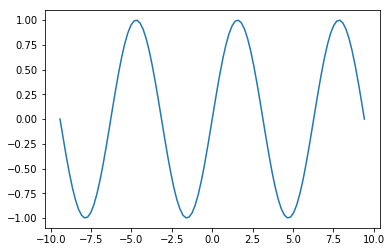

In [31]:
# useful when wanting to apply functions to all values!
x = np.linspace(-np.pi*3,np.pi*3,100)
y = np.sin(x)
plt.plot(x,y)

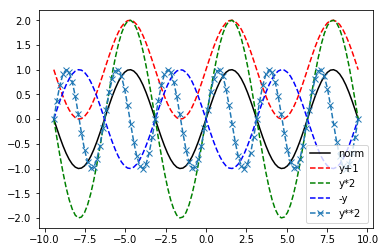

In [32]:
b = y+1
c = y*2
d = -y
e = np.sin(2*x)
plt.plot(x,y,'k-',label="norm")
plt.plot(x,b,'r--',label="y+1")
plt.plot(x,c,'g--',label="y*2")
plt.plot(x,d,'b--',label="-y")
plt.plot(x,e,'x--',label="y**2")
plt.legend()

In [33]:
np.sqrt(b)

array([ 1.        ,  0.90041588,  0.79267745,  0.67776042,  0.55670548,
        0.43060893,  0.30061272,  0.16789411,  0.03365503,  0.10088884,
        0.23451904,  0.3660254 ,  0.49421698,  0.61793286,  0.73605263,
        0.8475066 ,  0.95128542,  1.04644926,  1.13213628,  1.2075705 ,
        1.27206878,  1.32504701,  1.3660254 ,  1.39463286,  1.41061031,
        1.41381305,  1.40421208,  1.38189435,  1.34706197,  1.30003039,
        1.24122553,  1.17117994,  1.09052797,  1.        ,  0.90041588,
        0.79267745,  0.67776042,  0.55670548,  0.43060893,  0.30061272,
        0.16789411,  0.03365503,  0.10088884,  0.23451904,  0.3660254 ,
        0.49421698,  0.61793286,  0.73605263,  0.8475066 ,  0.95128542,
        1.04644926,  1.13213628,  1.2075705 ,  1.27206878,  1.32504701,
        1.3660254 ,  1.39463286,  1.41061031,  1.41381305,  1.40421208,
        1.38189435,  1.34706197,  1.30003039,  1.24122553,  1.17117994,
        1.09052797,  1.        ,  0.90041588,  0.79267745,  0.67

## Aggregation

Merging together values by row/column is very important. We may wish to consider the *average* value in a sample, let's say the average height in a group of individuals or the variance of weights across individuals. These methods condense down a vector of individual values regarding height or weight down to a *single value*.

**NumPy** provides not only the functionality to do this with vectors, but provides aggregation using *matrices* by column or by row. For instance, if we had measuring the change in weight for individuals (where rows represent time, columns represent individuals), we may take the average weight across all individuals to explore the *mean weight* across time. Here is a table of the most useful aggregation functions available in NumPy:

| Function name | NaN-safe Version | Description |
| ------------ | ---------------- | ------------------------------ | 
| `np.sum` | `np.nansum` | Compute sum of all elements |
| `np.prod` | `np.nanprod` | Compute product of all elements |
| `np.cumsum` | N/A | Compute the cumulative summation of elements |
| `np.cumprod` | N/A | Compute the cumulative product of elements |
| `np.mean` | `np.nanmean` | Compute arithmetic mean of elements |
| `np.std` | `np.nanstd` | Compute standard deviation |
| `np.var` | `np.nanvar` | Compute variance |
| `np.min` | `np.nanmin` | Find minimum value |
| `np.max` | `np.nanmax` | Find maximum value |
| `np.argmin` | `np.nanargmin` | Find index of minimum value |
| `np.argmax` | `np.nanargmax` | Find index of maximum value |
| `np.median` | `np.nanmedian` | Compute median / middle value of elements |
| `np.percentile` | `np.nanpercentile` | Compute rank-based statistics of elements |
| `np.any` | N/A | Evalue whether any elements are true |
| `np.all` | N/A | Evaluate whether all elements are true |

In [34]:
x = np.random.randn(1000)
x.mean()

-0.014641964901957771

In [35]:
x.std()

1.0039571405074288

In [36]:
print(a)
print(a.mean(axis=0))
print(a.mean(axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[ 6.  7.  8.  9.]
[  1.5   5.5   9.5  13.5]


In [37]:
a.cumsum()

array([  0,   1,   3,   6,  10,  15,  21,  28,  36,  45,  55,  66,  78,
        91, 105, 120])

In [38]:
f = np.random.randn(1000)

In [39]:
np.corrcoef(x,f)

array([[ 1.        ,  0.00330257],
       [ 0.00330257,  1.        ]])

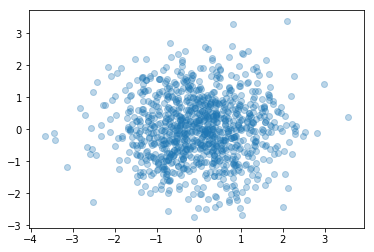

In [40]:
plt.scatter(x,f, alpha=.3)

In [41]:
# applying covariance matrix
g = np.random.randn(1000,2)
c = np.array([[2., 1.],[1., 2.]])
# dot random values with covariance matrix
h = np.dot(g,c)
print(np.corrcoef(h[:,0],h[:,1]))

[[ 1.          0.79882139]
 [ 0.79882139  1.        ]]


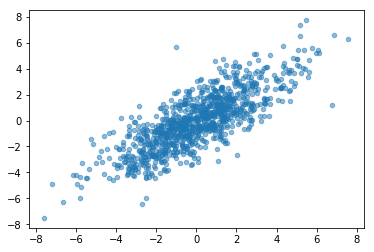

In [42]:
plt.scatter(h[:,0], h[:,1], alpha=.5, s=20.)

In [43]:
print("max: %f, min: %f, std: %f, sum: %f" % (h.max(), h.min(), h.std(), h.sum()))

max: 7.739090, min: -7.588889, std: 2.217908, sum: -30.233712


In [44]:
s = np.random.randint(0,100,(30,))
np.sort(s)

array([ 0,  5, 13, 13, 15, 18, 21, 29, 32, 34, 34, 34, 37, 40, 41, 44, 53,
       58, 65, 67, 72, 73, 76, 79, 83, 85, 94, 95, 96, 98])

Text(0, 0.5, '$\\epsilon$')

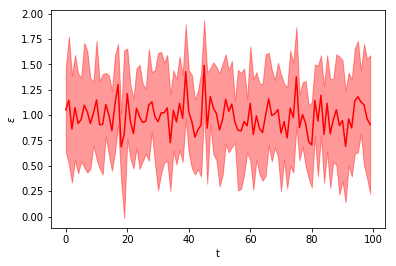

In [45]:
# error bars
N = 100
P = 10
# normal(mean, variance, size)
s = np.random.normal(1.0, 0.5, size=(N,P))
t = np.arange(N)
sm = s.mean(axis=1)
sd = s.std(axis=1)
plt.plot(t,sm,'r-')
plt.fill_between(t, sm + sd, sm - sd, color='r', alpha=.4)
plt.xlabel("t")
plt.ylabel(r"$\epsilon$")

## Subsetting, Slicing, Indexing

Numpy offers several ways to index into arrays.

*Slicing*: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [46]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [47]:
a[2, 1]

10

In [48]:
a[:2, 1:3]

array([[2, 3],
       [6, 7]])

In [49]:
# all row values for column 1
a[:,1]

array([ 2,  6, 10])

In [50]:
# use boolean mask selection
a[(a < 7) | (a > 10)]

array([ 1,  2,  3,  4,  5,  6, 11, 12])

In [51]:
# reverse, reverse!
a[::-1]

array([[ 9, 10, 11, 12],
       [ 5,  6,  7,  8],
       [ 1,  2,  3,  4]])

We can also **change** a value when accessing a single value *or* subset:

In [52]:
a[2,2] = 25
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 25, 12]])

### Copies vs Views

A common **gotcha** moment.

When we use 'slice' notation to look at part of an array, it produces a *view*, meaning it points to the same memory of the original array. If we use *fancy-indexing*, it will assign direct changes to the array.

#### example:

In [53]:
x = np.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [54]:
y = x[::2]
print(y)

[0 2 4 6 8]


In [55]:
y[3] = 100
print(y)
print(x)

[  0   2   4 100   8]
[  0   1   2   3   4   5 100   7   8   9]


## Dot products

Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot` is available both as a function in the numpy module and as an instance method of array objects. It does the following:

- If both `a` and `b` are 1-D, the inner/scalar product of vectors is calculated.
- If both `a` and `b` are 2-D, matrix multiplication: using the function `np.matmul` or (`a @ b`) is preferred.
- If `a` or `b` is scalar, it is equivalent to `multiply` and applying that scalar to all values of the other vector/matrix. Use `a * b` instead.
- If `a` is $N$-D array and `b` is 1-D, it is a sum product over the last axis of `a` and `b`.
- If `a` is an $N$-D array and `b` is an $M$-D array (where $M >= 2$), it is a sum product over the last axis of `a` and the second-to-last axis of `b`.

In [56]:
a = np.arange(9).reshape(3,3)
b = np.arange(3)
c = np.full(3, 2)

/home/gparkes/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(3, 2) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [57]:
# vector-vector dot product (scalar product)
print(b, c)
np.dot(b, c)

[0 1 2] [ 2.  2.  2.]


6.0

In [58]:
# matrix-vector dot product
print(a,b)
np.dot(a,b)

[[0 1 2]
 [3 4 5]
 [6 7 8]] [0 1 2]


array([ 5, 14, 23])

In [59]:
# matrix-matrix dot product
a.dot(a)

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

Note that while in mathematics a **matrix-vector** dot product where the vector is the left-hand term is invalid, this is allowed in Python, it will just assume it is as normal:

In [60]:
b.dot(a)

array([15, 18, 21])

## Array Manipulation

There are hosts of manipulations that can be applied to both vectors and matrices; we will explore the common ones here:

In [61]:
# transpose
print("{} \n\n {}".format(a, a.T))

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

 [[0 3 6]
 [1 4 7]
 [2 5 8]]


In [62]:
print(a)
print(a.ravel())

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 1 2 3 4 5 6 7 8]


In [63]:
print(s.shape)
print(s.reshape(500,2).shape)

(100, 10)
(500, 2)


In [64]:
np.vstack((b, c))

array([[ 0.,  1.,  2.],
       [ 2.,  2.,  2.]])

In [65]:
np.hstack((a,a))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [66]:
np.concatenate((a,b.reshape(1,3)), axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2]])

In [67]:
np.concatenate((a,b.reshape(3,1)), axis=1)

array([[0, 1, 2, 0],
       [3, 4, 5, 1],
       [6, 7, 8, 2]])

## Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

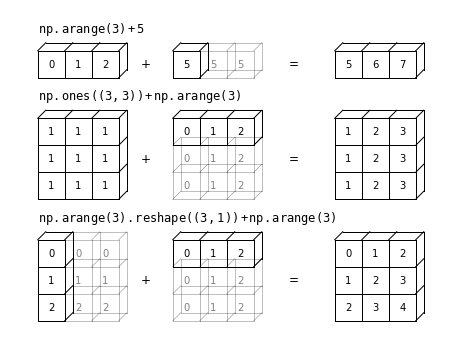

In [129]:
extra_figs.demo_broadcasting_cubes()

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [68]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

This works; however when the matrix $x$ is very large, computing an explicit loop in Python could be slow. Note that adding the vector $v$ to each row of the matrix $x$ is equivalent to forming a matrix vv by stacking multiple copies of $v$ vertically, then performing elementwise summation of $x$ and $vv$. We could implement this approach like this:

In [69]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)
y = x + vv  # Add x and vv elementwise
y  # Prints "[[ 2  2  4

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

Numpy broadcasting allows us to perform this computation without actually creating multiple copies of $v$. Consider this version, using broadcasting:

In [70]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

Another example of useful broadcasting is when we want to display images based on two-dimensional functions. For example if we define $z=f(x, y)$, broadcasting can be used to compute the function across a grid trivially:

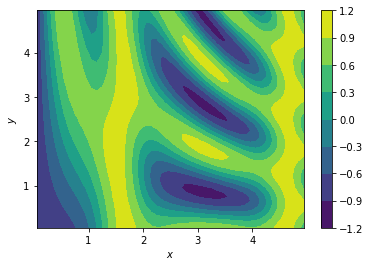

In [123]:
x = np.linspace(0, 5, 50)
y = np.atleast_2d(np.linspace(0, 5, 50)).T
z = np.sin(x)**10 + np.cos(10 + y * x) * np.cos(x)
plt.contourf(z, origin="lower", extent=[0, 5, 0, 5], cmap="viridis")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.colorbar()
plt.show()

## Vectorizing Functions

One of the features that NumPy provides is a class vectorize to convert an ordinary Python function which accepts scalars and returns scalars into a “vectorized-function” with the same broadcasting rules as other Numpy functions (i.e. the Universal functions, or ufuncs). For example, suppose you have a Python function named `addsubtract()` defined as:

In [71]:
def addsubtract(a,b):
    if a>b:
        return a-b
    else:
        return a+b

which defines a function of two scalar variables and returns a scalar result. The class `vectorize` can be used to “vectorize “this function so that:

In [72]:
vec_addsubtract = np.vectorize(addsubtract)

Now we can call our created function on some data and NumPy will treat our Python function as if it's C:

In [73]:
vec_addsubtract([0,3,6,9],[1,3,5,7])

array([1, 6, 1, 2])

This particular function could have been written in vector form without the use of `vectorize`. However, functions that employ optimization or integration routines can likely only be vectorized using `vectorize`.

## Polynomials

We can use the poly1d class from Numpy. This class accepts coefficients or polynomial roots to initialize a polynomial. The polynomial object can then be manipulated in algebraic expressions, integrated, differentiated, and evaluated. It even prints like a polynomial:

In [74]:
x = np.poly1d([3,4,5])
x

poly1d([3, 4, 5])

In [75]:
print(x)

   2
3 x + 4 x + 5


In [76]:
print(x*x)

   4      3      2
9 x + 24 x + 46 x + 40 x + 25


In [77]:
print(x.integ(k=6))

   3     2
1 x + 2 x + 5 x + 6


In [78]:
print(x.deriv())

 
6 x + 4


In [79]:
print(x([4,5]))

[ 69 100]


Alternatively we may wish to obtain the slope and intercept coefficients by *fitting* a polynomial to data samples $x$ and $y$, we can use `np.polyfit` on a linear-relationship:

slope=0.9669, intercept=2.9665


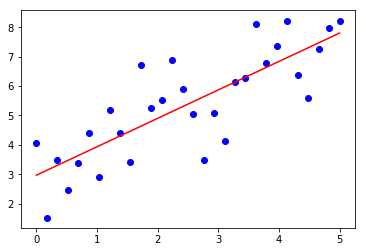

In [80]:
N = 30
x = np.linspace(0,5,N)
y = x + np.random.randn(N) + 3

linear_mod = lambda x, m, b: x*m+b
# fit a straight line, slope first, intercept last
m, b = np.polyfit(x, y, deg=1)
print("slope=%.4f, intercept=%.4f" % (m, b))
plt.scatter(x, y, c='b')
plt.plot(x, linear_mod(x,m,b), 'r-')
plt.show()

Now a second-order relationship:

slope 1=-1.1238, slope 2=1.1339, intercept=4.8757


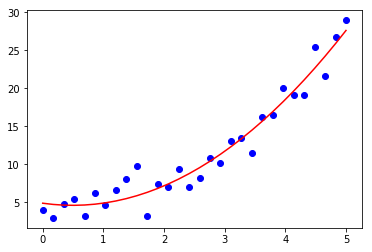

In [81]:
x = np.linspace(0,5,N)
y = (x**2) + np.random.normal(scale=2., size=N) + 3

deg2_mod = lambda x, m1, m2, b: m2*x**2 + x*m1 + b

m2, m1, b = np.polyfit(x, y, deg=2)
print("slope 1=%.4f, slope 2=%.4f, intercept=%.4f" % (m1, m2, b))
plt.scatter(x, y, c='b')
plt.plot(x, deg2_mod(x, m1, m2, b), 'r-')
plt.show()

### Is it actually faster than using lists?

NumPy is considerably faster than using in-house Python objects. Let's time it.

I hope your machine can handle 1 million elements...

**Yes**, NumPy absolutely hammers list comprehensions at most practical sizes.

Running step size:100
18.2 µs ± 98.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
494 ns ± 12.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
Running step size:1000
183 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.04 µs ± 17 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
Running step size:10000
1.95 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.43 µs ± 61 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Running step size:100000
19.5 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
47.2 µs ± 706 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Running step size:1000000
204 ms ± 7.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.17 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


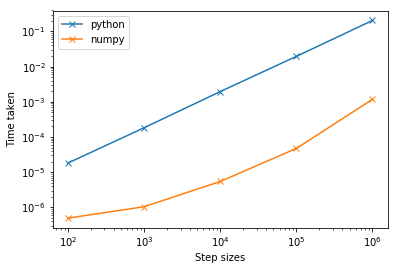

In [82]:
step_sizes = np.logspace(2,6,5,dtype=np.int)

times_py = []
times_np = []
for step in step_sizes:
    print("Running step size:{}".format(step))
    np_list = np.arange(step, dtype=np.int)
    py_list = list(range(step))
    
    t_py = %timeit -o [i**2 for i in py_list]
    t_np = %timeit -o np.square(np_list)
    
    times_py.append(t_py)
    times_np.append(t_np)
    
y_py = np.array([np.array(times_py[i].timings).mean() for i in range(len(times_py))])
y_np = np.array([np.array(times_np[i].timings).mean() for i in range(len(times_np))])

plt.loglog(step_sizes, y_py, 'x-', label="python")
plt.loglog(step_sizes, y_np, 'x-', label="numpy")
plt.xlabel("Step sizes")
plt.ylabel("Time taken")
plt.legend()
plt.show()

# Tasks

One of the areas of interest in *population genetics* is the study of mutation, selection and crossover within genetic populations. We will be exploring the use of the **Fisher-Wright model**. In this example, we will consider the change of an allele in the genetic population from state *A* (normal) to state *B* (mutant). We make some assumptions:
1. *B* has a selective advantage of $1+s$.
2. _A mutates to B_ with forward mutation rate $\mu$.
3. *B mutates to A* with backward mutation rate $\nu$.
4. The population size $P$ is finite.

To change the population $P$ over time $t$, we have a 3-stage process:

To begin with, the number of mutants $n_0=0$.

- We calculate the proportion of mutant seeds $p_s$ as:

$$
    p_s =\frac{(1+s)n}{P+sn}
$$

- With the proportion of mutant seeds, we can estimate the proportion of mutants $p_{sm}$ produced from those mutant seeds:

$$
    p_{sm}=(1-\nu)p_s + \mu(1-p_s)
$$

- Using the total population P with the proportion of mutants $p_{sm}$, we assume independence between individuals and therefore can draw $n_t$ mutants from the binomial distribution. This can be used from `np.random.binomial(P, p_sm)`.

This program runs while the number of mutants $n_t<P$ population for takeover, or $t$ has exceeded some maximum time $T_{max}$.

## Task 1.

Create a Gaussian distribution of samples by only generating from the Uniform distribution $\mathcal{U}(0, 1)$ (`np.random.rand`). This can be done as:

$$
\mathcal{N}_i(\mu,\sigma^2)= \sum_{j=1}^p U_{ij} - \sum_{j=1}^p W_{ij}
$$

where $U_{ij} \sim \mathcal{U}(0,1)$ and $W_{ij} \sim \mathcal{U}(0,1)$. Draw $N=10^3$ samples of the normal distribution. Plot them as a histogram. Initially set $p=20$. Change $p$ and see what happens to the distribution.

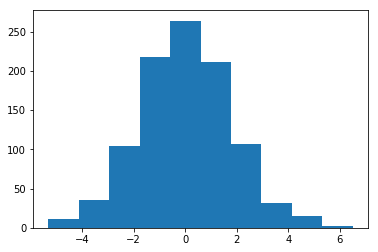

In [125]:
N = 1000
p = 20
_ = plt.hist(np.sum(np.random.rand(p,N),axis=0)-np.sum(np.random.rand(p,N),axis=0))

### Task 2. 

Write a function `fisher_wright(P, s, mu, nu, Tmax)` that, given the population size $P=200$, the selective advantage $s=0.1$, the forward $\mu=10^{-3}$ and backward $\nu=10^{-3}$ mutation rates, and a maximum time $T_{max}=10^3$ returns the number of mutants time-series as a numpy array.

In [84]:
# your codes here
import numpy as np

def fisher_wright(P, s, mu, nu, Tmax):
    t = 0
    n = np.zeros((Tmax+1), dtype=np.int64)
    while n[t]<P and t<Tmax:
        # select
        p_s = (1+s)*n[t] / (P+s*n[t])
        # mutate
        p_sm = (1-nu)*p_s + mu*(1.-p_s)
        # sample
        t += 1
        n[t] = np.random.binomial(P, p_sm)
    return n[:t+1]

### Task 3.

Plot time $t$ against the number of mutants $n$ using `plt.plot`. Do this for four different sets of inputs:

1. $P=2 \times 10^2, s=10^{-1}, \mu=10^{-3}, \nu=10^{-3}$
2. $P=2 \times 10^2, s=10^{-1}, \mu=10^{-1}, \nu=10^{-3}$
3. $P=2 \times 10^2, s=0, \mu=10^{-3}, \nu=10^{-3}$
4. $P=2 \times 10^2, s=10^{-1}, \mu=10^{-3}, \nu=10^{-1}$

You can either do this in different plots, or all in the same plot with legend. What is happened with the difference of parameters?

Remember to label your axes.

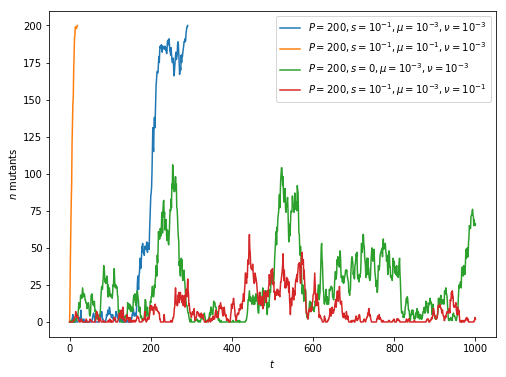

In [122]:
# your codes here
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline

param_sets = [
    (200, 0.1, 0.001, 0.001, int(10**3)),
    (200, .1, .1, .001, int(10**3)),
    (200, 0, .001, .001, int(10**3)),
    (200, .1, .001, .1, int(10**3)),
]

names = [r"$P=200, s=10^{-1}, \mu=10^{-3}, \nu=10^{-3}$",
         r"$P=200, s=10^{-1}, \mu=10^{-1}, \nu=10^{-3}$",
         r"$P=200, s=0, \mu=10^{-3}, \nu=10^{-3}$", 
         r"$P=200, s=10^{-1}, \mu=10^{-3}, \nu=10^{-1}$"
]

fig, axes = plt.subplots(figsize=(8,6))

for p, name in zip(param_sets, names):
    nt = fisher_wright(*p)
    axes.plot(np.arange(nt.shape[0]), nt, label=name)
axes.set_xlabel(r"$t$")
axes.set_ylabel(r"$n$ mutants")
axes.legend(loc="upper right")
plt.show()

### Task 4.

Modify `fisher_wright()` to take an additional argument, $N_r$, which could be the number of realisations (or attempts). Re-run the function with $N_r=10^4$, take the mean with respect to $N_r$ and plot time $t$ against the mean number of mutants $n$ with error bars (as confidence intervals; $2 \times sd$), using `plt.fill_between()`.

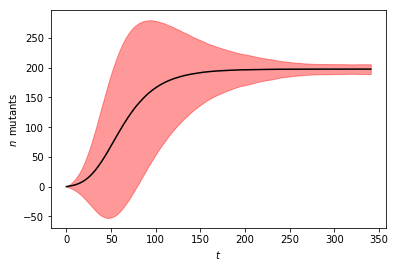

In [91]:
# your codes here
def fisher_wright_modified(P, s, mu, nu, Tmax, Nr):
    t = 0
    n = np.zeros((Tmax+1, Nr), dtype=np.int32)
    # once a certain proportion (say 10%) of the matrix contains total population P, we stop iterating.
    prop = ((Tmax+1)*Nr) * 0.1
    while np.sum(n==P) < prop and t < Tmax:
        p_s = (1+s)*n[t,:] / (P+s*n[t,:])
        # mutate
        p_sm = (1-nu)*p_s + mu*(1.-p_s)
        # sample
        t += 1
        n[t,:] = np.random.binomial(P, p_sm, size=(Nr,))
    return n[:t+1,:]

nt2 = fisher_wright_modified(200, 0.1, 0.001, 0.001, int(10**3), int(10**4))
ntm = nt2.mean(axis=1)
ntsd = nt2.std(axis=1)
t = np.arange(len(nt2))
    
plt.plot(t, ntm, 'k-')
plt.fill_between(t, ntm - 2*ntsd, ntm + 2*ntsd, color='r', alpha=.4)
plt.xlabel(r"$t$")
plt.ylabel(r"$n \,$ mutants")

plt.show()